In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [3]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size = 5)

In [4]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,981,943,913,957,922,927,917,895,971,871
gene2,107,113,112,123,94,119,107,105,105,119
gene3,163,194,177,186,183,427,471,469,419,489
gene4,39,29,34,36,40,887,986,995,968,923
gene5,871,915,961,932,912,682,684,681,665,642


In [5]:
scaled_data = preprocessing.scale(data.T)

In [6]:
pca = PCA()

In [7]:
pca.fit(scaled_data)

PCA()

In [8]:
pca_data = pca.transform(scaled_data)

In [9]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

<function matplotlib.pyplot.show(close=None, block=None)>

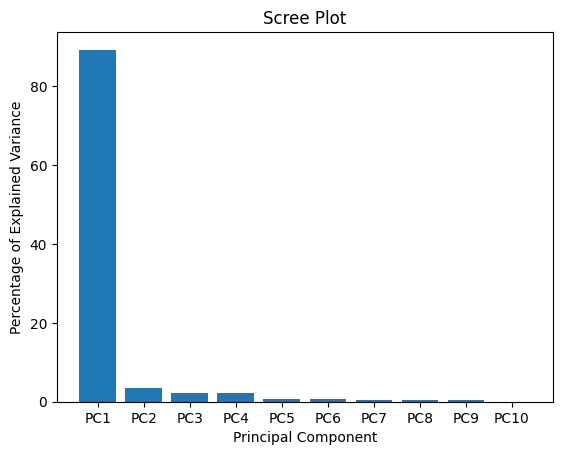

In [10]:
plt.bar(x=range(1,len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show